<a href="https://colab.research.google.com/github/shruthymenon/YOLOv8-Model-Training-and-Deployment-for-Object-Detection/blob/main/YOLOv8_Model_Training_and_Deployment_for_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.72
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 23.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO      # imports the YOLO class from the ultralytics package
import os   #imports the os module, which provides functions for interacting with the operating system, such as manipulating file paths and directories.
from IPython.display import display,Image #. These classes are used for displaying images and other content within IPython
from IPython import display #The display module provides functions for controlling the display of output within IPython
display.clear_output() #clear_output() function from the display module to clear the output displayed
!yolo checks # ultralytics package and is used to perform checks or diagnostics related to the YOLO algorithm.

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [6]:
!yolo task = detect mode=predict model=yolov8n.pt conf=0.30 source='/content/damir-kopezhanov-nC6CyrVBtkU-unsplash-scaled.jpg'

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/damir-kopezhanov-nC6CyrVBtkU-unsplash-scaled.jpg: 416x640 6 persons, 3 chairs, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 61.3ms
Speed: 13.7ms preprocess, 61.3ms inference, 21.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


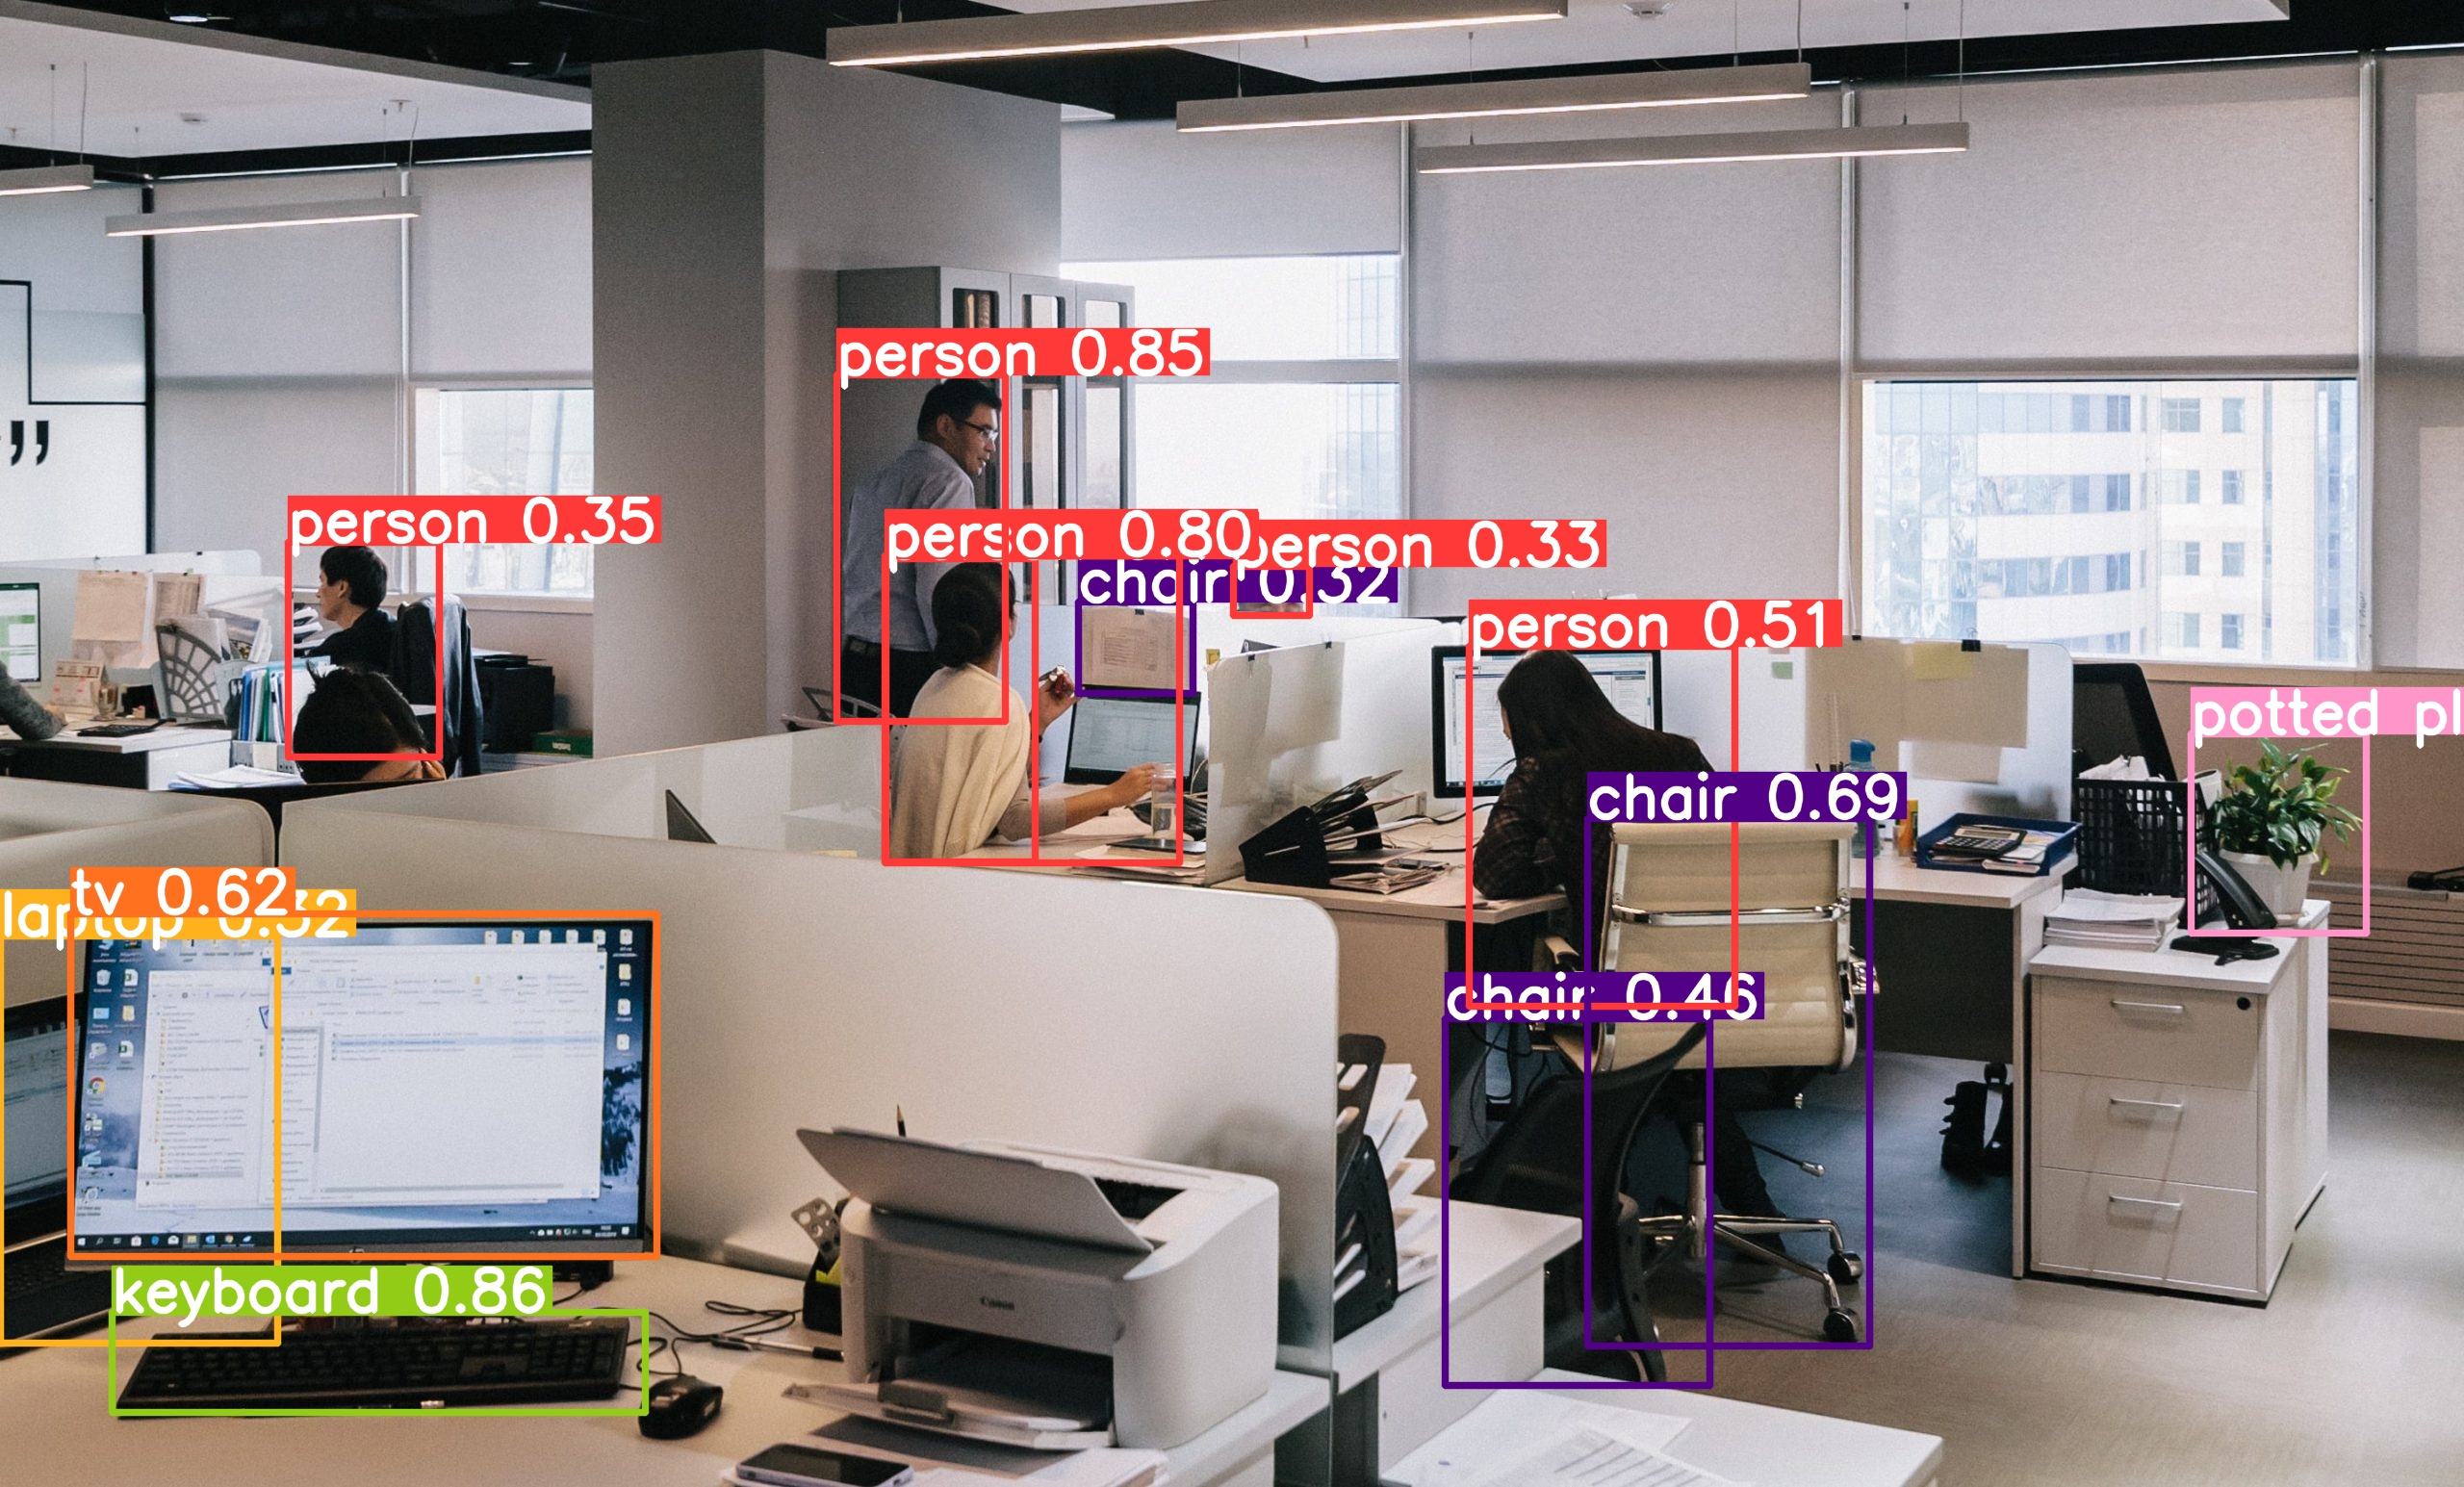

In [7]:
Image(filename='/content/runs/detect/predict/damir-kopezhanov-nC6CyrVBtkU-unsplash-scaled.jpg',height=600)

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KuHpGId9jwwUFEVDeO59")
project = rf.workspace("final-project-7gql2").project("vehicle-detection-i66s2")
dataset = project.version(16).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to vehicle-detection-16 in yolov8:: 100%|██████████| 3782/3782 [00:01<00:00, 2581.45it/s]


In [9]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 54.3MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/vehicle-detection-16/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

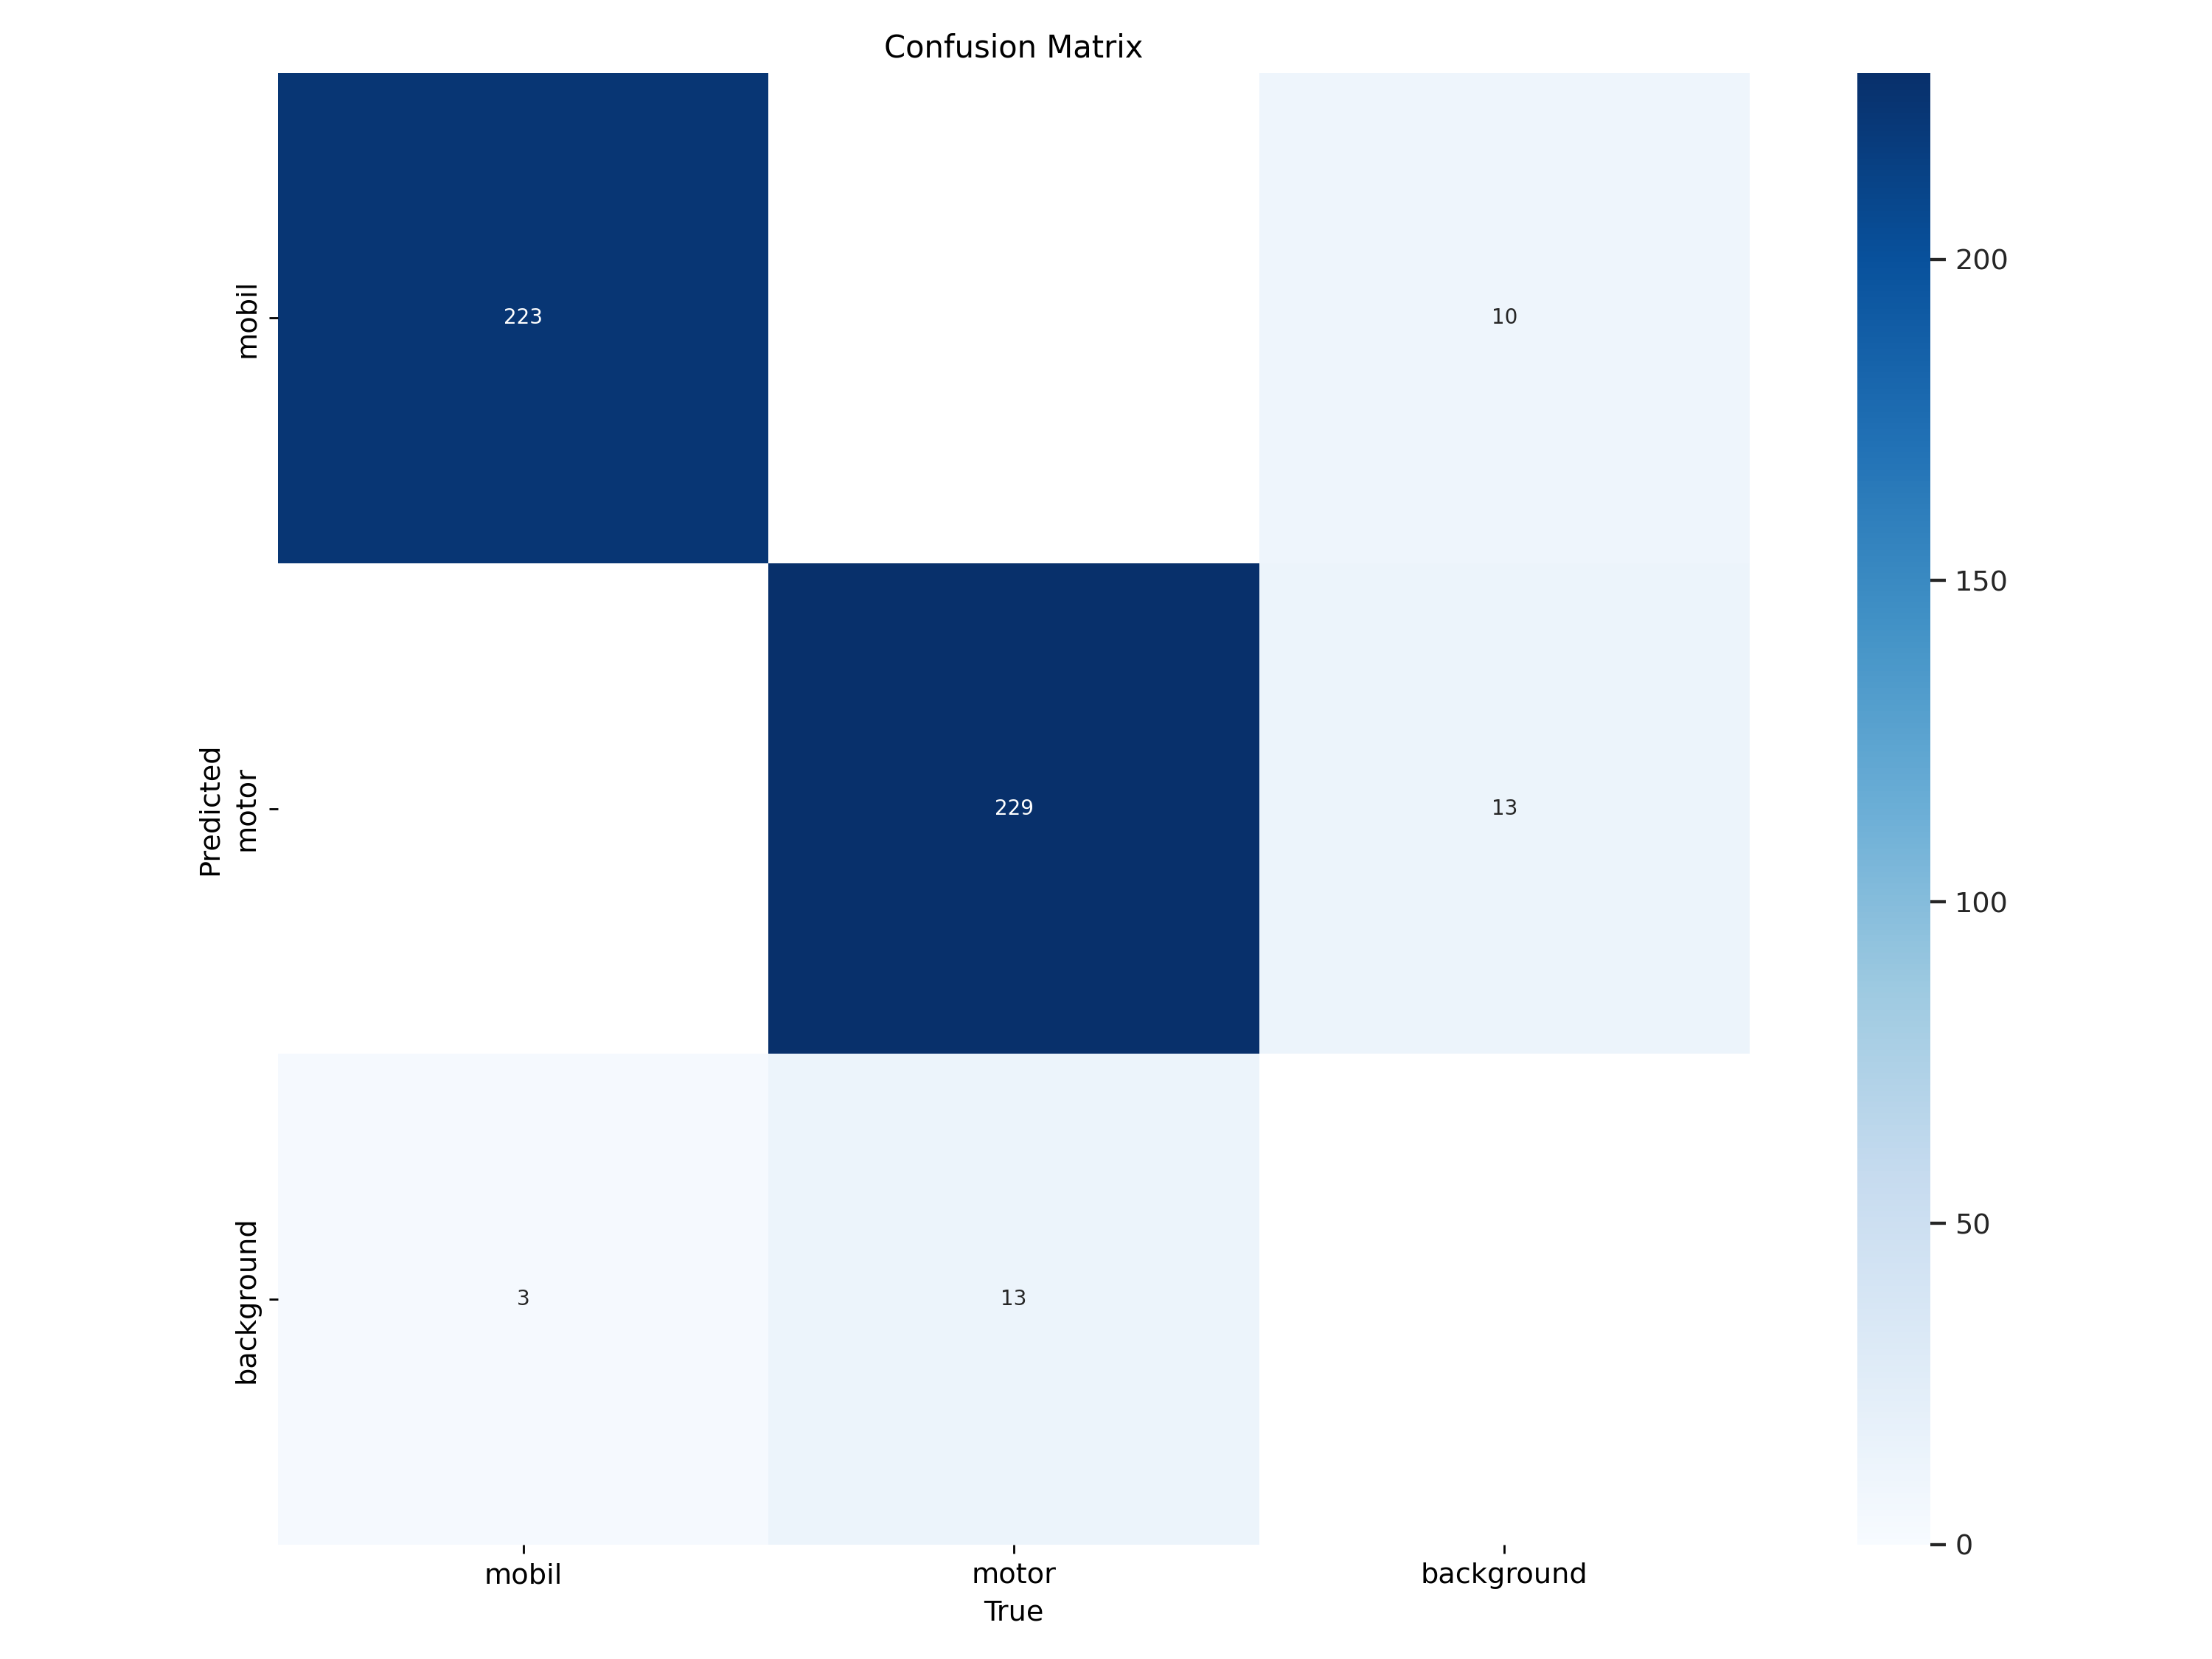

In [11]:
Image(filename='/content/runs/detect/train/confusion_matrix.png',width=600)

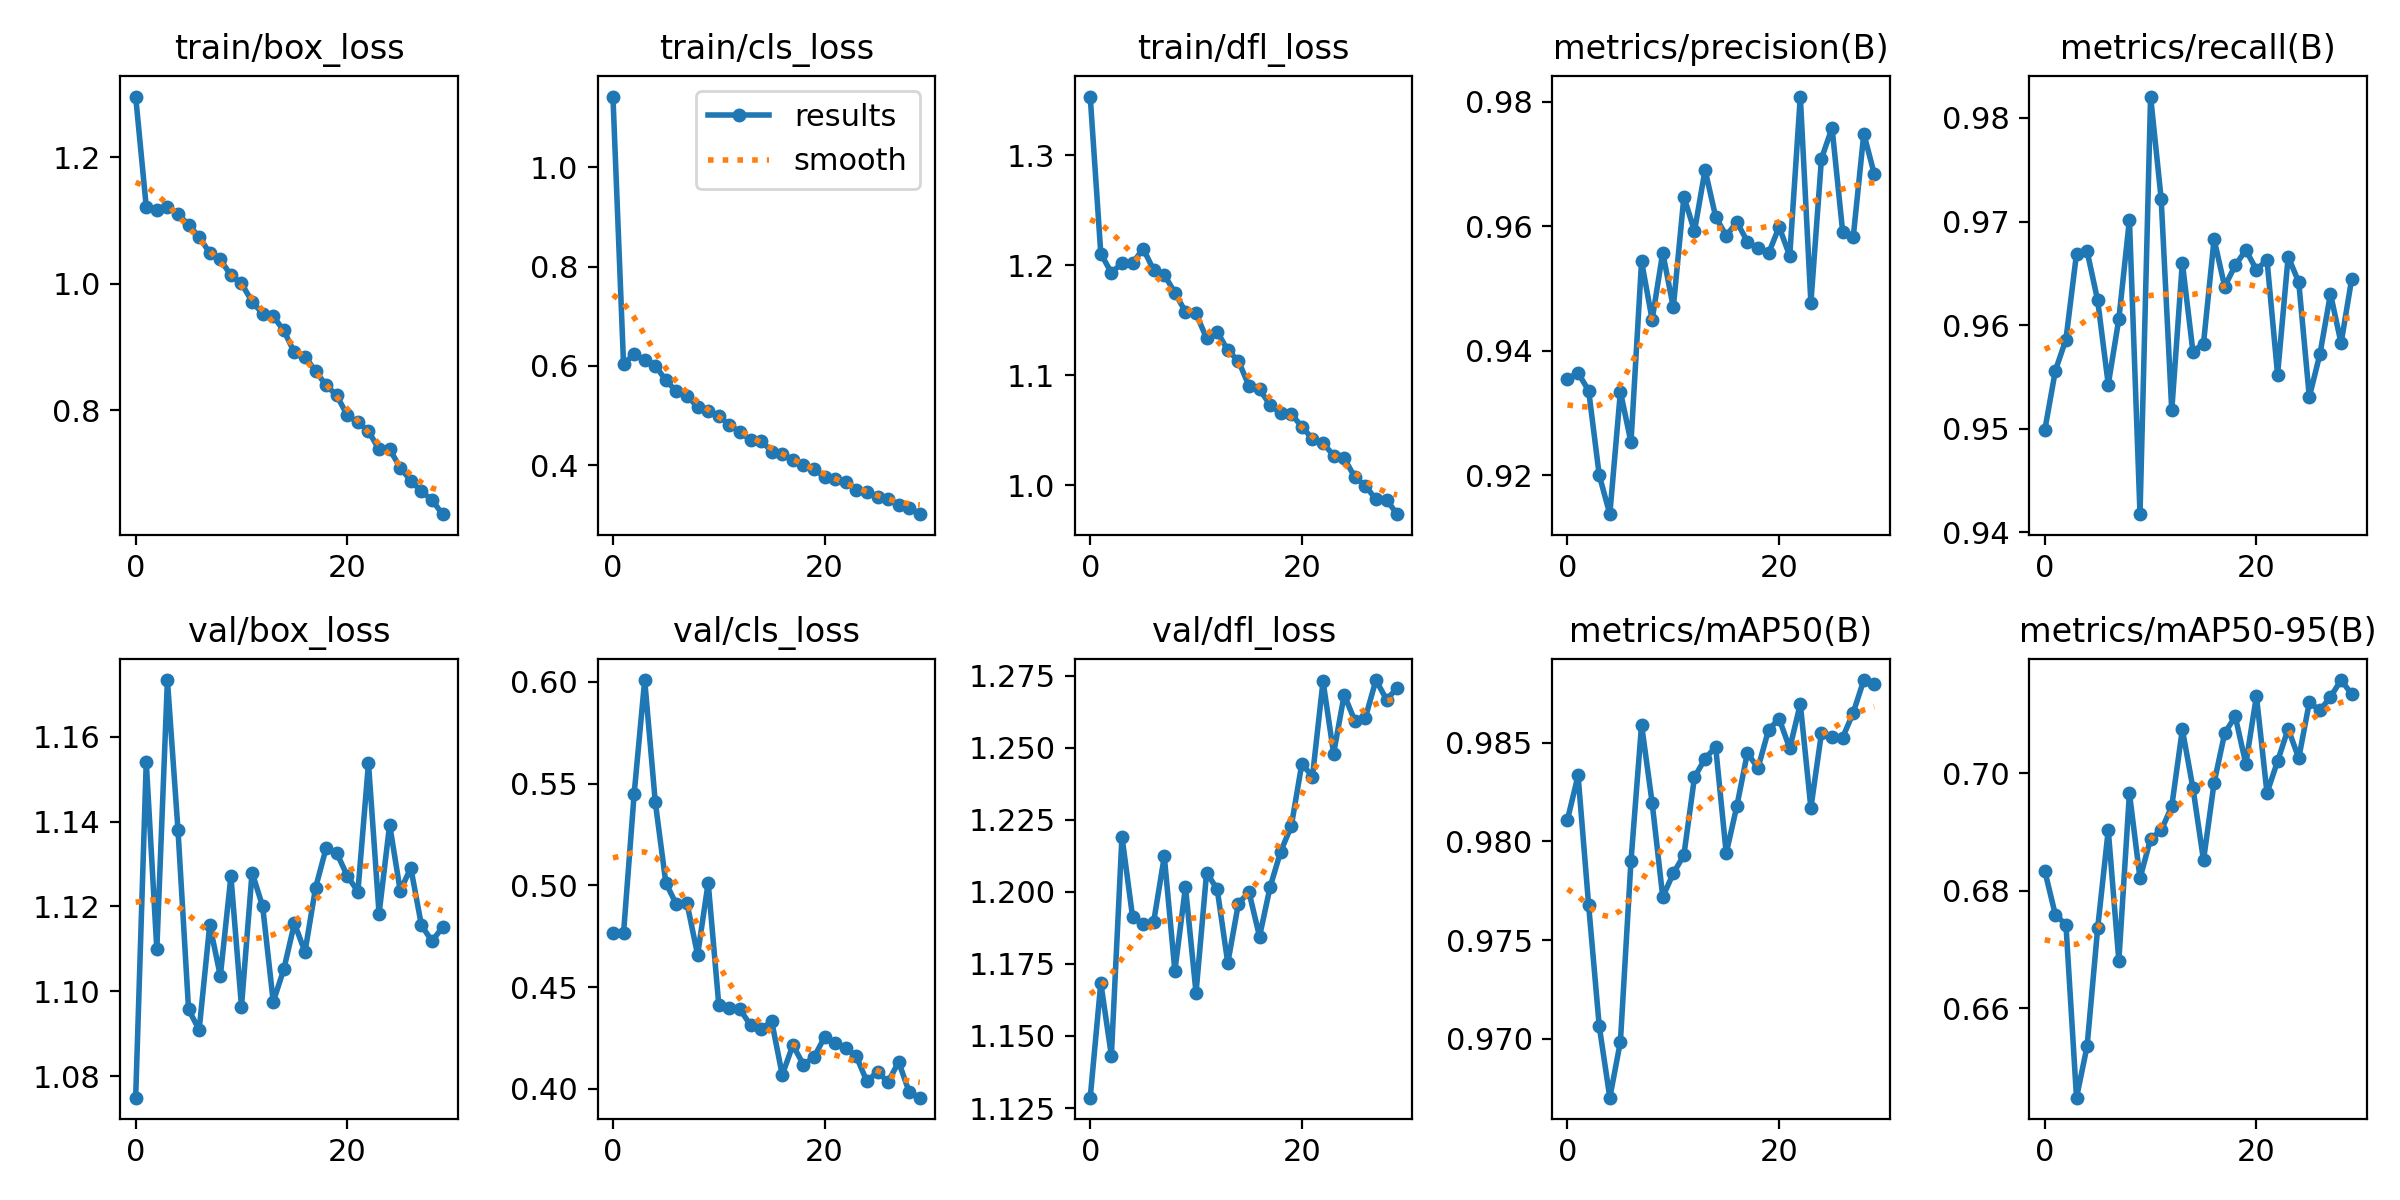

In [13]:
Image(filename='/content/runs/detect/train/results.png',width=900)

In [3]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients
val: Scanning /content/vehicle-detection-16/valid/labels.cache... 84 images, 0 backgrounds, 0 corrupt: 100% 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.12s/it]
                   all         84        468      0.975      0.958      0.988      0.717
                 mobil         84        226      0.973      0.987      0.993      0.814
                 motor         84        242      0.977       0.93      0.983       0.62
Speed: 3.6ms preprocess, 26.9ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/detect/val2


In [6]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25  source={dataset.location}/test/images

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients

image 1/8 /content/vehicle-detection-16/test/images/Screenshot-1411-_png.rf.20dcbea296aa093885d6ac07ea4f1028.jpg: 640x640 2 mobils, 4 motors, 37.6ms
image 2/8 /content/vehicle-detection-16/test/images/Screenshot-1422-_png.rf.bad5d10de5d820cc40b034ae0c8280df.jpg: 640x640 5 mobils, 6 motors, 36.9ms
image 3/8 /content/vehicle-detection-16/test/images/Screenshot-1453-_png.rf.ea38a9094b1852d6ca4cebf518113869.jpg: 640x640 3 mobils, 3 motors, 32.3ms
image 4/8 /content/vehicle-detection-16/test/images/Screenshot-231-_png.rf.e67dc6264fd3cc8cbafab5a86be89b5d.jpg: 640x640 6 mobils, 2 motors, 25.3ms
image 5/8 /content/vehicle-detection-16/test/images/Screenshot-261-_png.rf.37b99a692c29366f2abb8e38db0aa534.jpg: 640x640 6 mobils, 5 motors, 25.3ms
image 6/8 /content/vehicle-detection-16/test/images/WhatsApp-Image-2023-05-19-at-16-19-44_jpg.rf.fa4

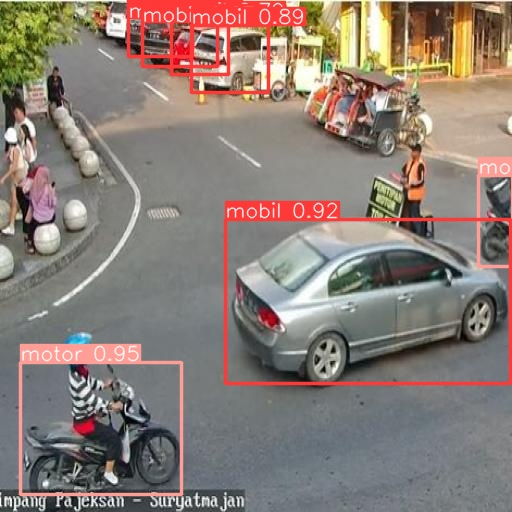

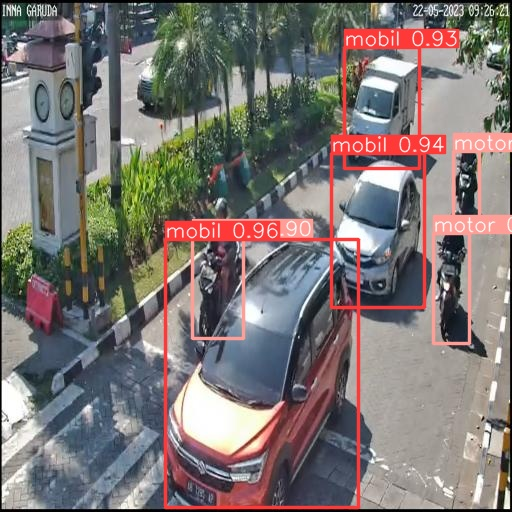

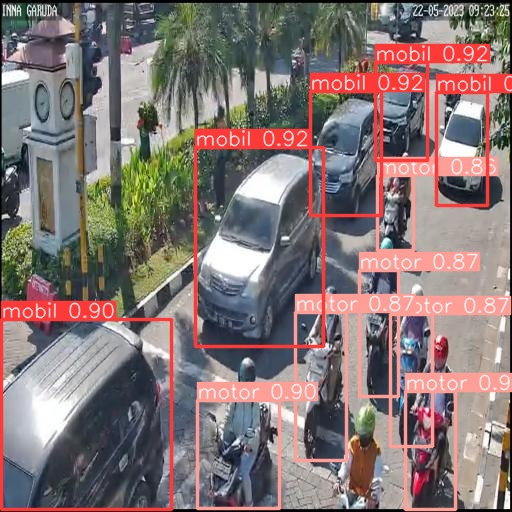

In [8]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg')[:3]:
  display(Image(filename=image_path,height=600))
  print("\n")
